# Fundamentals of Machine Learning - Exercise 9
Dominique Cheray & Manuel Krämer

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import decomposition

## 1 Setup

In [2]:
digits = load_digits()
X = digits["data"] / 255
Y = digits["target"]

##  2 Non-negative matrix factorization vs. SVD comparison

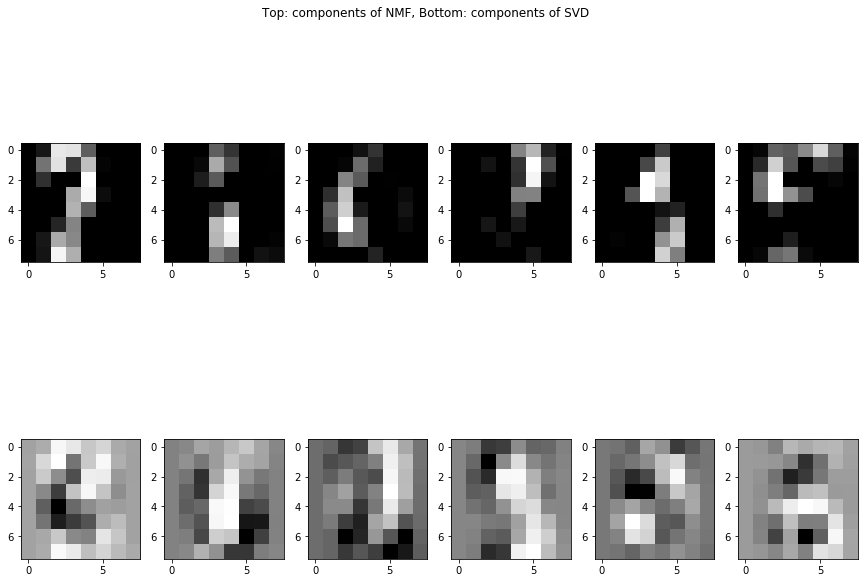

In [3]:
nmf = decomposition.NMF(n_components=10)
W1 = nmf.fit_transform(X)
H1 = nmf.components_

means = np.mean(X, axis=0)
X_centered = X - means

U, S, V = np.linalg.svd(X_centered, full_matrices=True)
V = V + means

fig, axes = plt.subplots(2, 6, figsize=(15, 10))
axes = axes.ravel()
fig.suptitle('Top: components of NMF, Bottom: components of SVD')
for i in range(6):
    axes[i].imshow(H1[i,:].reshape(8, 8), cmap=plt.cm.Greys_r)
for i in range(6, 12):
    axes[i].imshow(V[i-6, :].reshape(8, 8), cmap=plt.cm.Greys_r)
plt.show()

For the NMF components most of the values are 0 which makes senes, since for all numbers the biggest part of the image is just black background. One can also see prototypical parts of the numbers out of whom the different numbers can be formed.
For the SVD the values of the components vary way more and rather form protoypical numbers and not prototypical parts of numbers.